# Time series SMA,CMA,EMA,EWMA

In [7]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [9]:
df_tesla=pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001
...,...,...,...,...,...,...
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015


## simple moving Avarage 

Given a series of numbers and a fixed subset size, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.

A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles. The threshold between short-term and long-term depends on the application, and the parameters of the moving average will be set accordingly.

<AxesSubplot:xlabel='Date'>

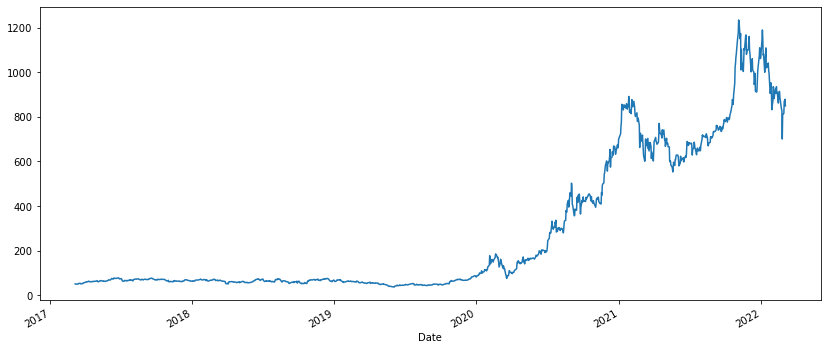

In [11]:
df_tesla["Open"].plot(figsize=(14,6))

In [28]:
df_tesla["Open:10 rolling"]=df_tesla["Open"].rolling(window=10).mean()

In [29]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close,Open:10 rolling
Date,,,,,,,
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,NaN
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001,NaN
...,...,...,...,...,...,...,...
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993,846.407001
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995,847.217999
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015,844.431000


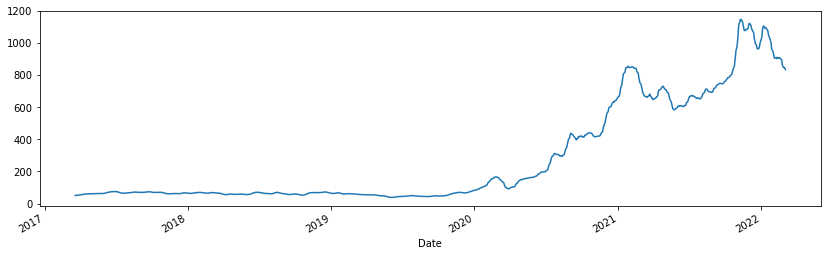

In [26]:
df_tesla["Open:10 rolling"]=df_tesla["Open"].rolling(window=10).mean().plot(figsize=(14,4))

<AxesSubplot:xlabel='Date'>

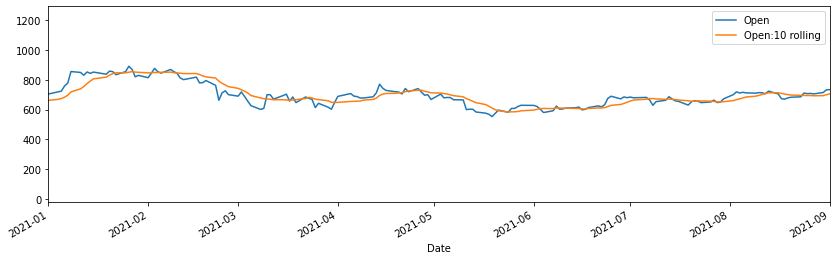

In [40]:
df_tesla[['Open','Open:10 rolling']].plot(xlim=['2021-01-01','2021-09-01'],figsize=(14,4))

In [44]:
df_tesla["Open:30 rolling"]=df_tesla["Open"].rolling(window=30).mean() 
df_tesla["Open:50 rolling"]=df_tesla["Open"].rolling(window=50).mean() 


<AxesSubplot:xlabel='Date'>

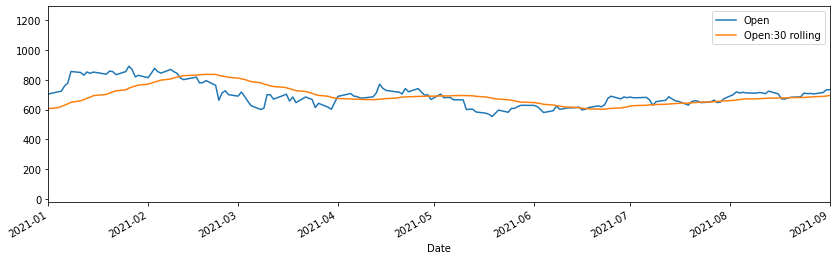

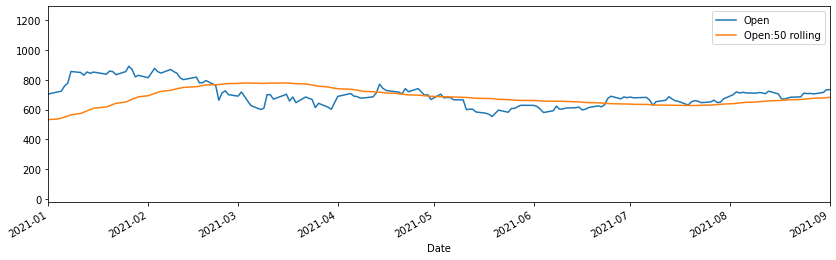

In [45]:
df_tesla[['Open','Open:30 rolling']].plot(xlim=['2021-01-01','2021-09-01'],figsize=(14,4))
df_tesla[['Open','Open:50 rolling']].plot(xlim=['2021-01-01','2021-09-01'],figsize=(14,4))

Dis Advantages of SMA
1. it giving imp to the each data point but in time series want to give more impt the recent data 

### Cumulative moving average (CMA)

In a cumulative moving average (CMA), the data arrive in an ordered datum stream, and the user would like to get the average of all of the data up until the current datum.

Expamding()

<AxesSubplot:xlabel='Date'>

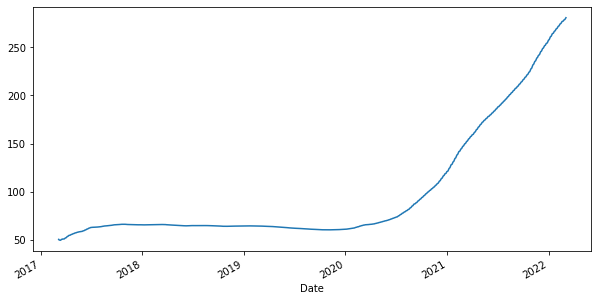

In [50]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

### Exponential moving average

In [58]:
#let's smoothing factor -0.1
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1).mean()

In [59]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open:10 rolling,Open:30 rolling,Open:50 rolling,EMA_0.1
Date,,,,,,,,,,
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN,NaN,NaN,50.383999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN,NaN,NaN,49.866106
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN,NaN,NaN,49.740606
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,NaN,NaN,NaN,49.595620
2017-03-13,49.369999,48.556000,48.964001,49.234001,15113000.0,49.234001,NaN,NaN,NaN,49.441382


<AxesSubplot:xlabel='Date'>

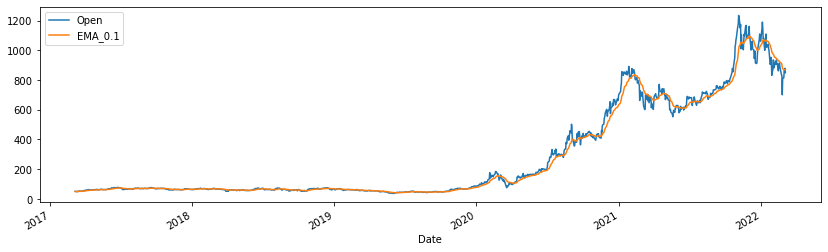

In [60]:
df_tesla[['Open','EMA_0.1']].plot(figsize=(14,4))

Exponential moving average use to remove the lagging in the data set

In [62]:
df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5,).mean()

<AxesSubplot:xlabel='Date'>

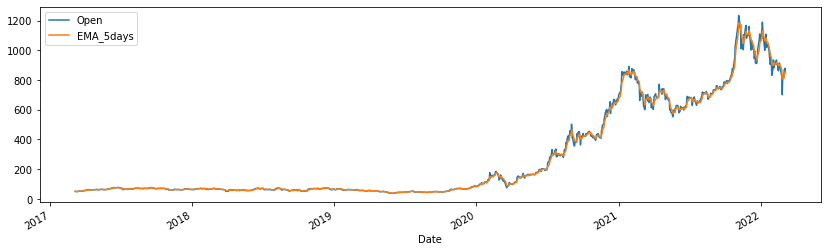

In [64]:
df_tesla[['Open','EMA_5days']].plot(figsize=(14,4))